In [ ]:
# Step 1: Install necessary libraries

!pip install --upgrade yfinance==0.2.54
# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:

# Step 3: Download stock data for Google (GOOGL)
data = yf.download("GOOGL", start="2010-01-01", end="2025-01-01")

data.head(10)


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2010-01-04,15.627782,15.696602,15.565197,15.632769,78169752
2010-01-05,15.558963,15.654962,15.497874,15.638505,120067812
2010-01-06,15.166740,15.605590,15.119365,15.605590,158988852
2010-01-07,14.813666,15.210128,14.777512,15.195166,256315428
2010-01-08,15.011149,15.041818,14.689242,14.761304,188783028
2010-01-11,14.988459,15.071990,14.812170,15.071990,288227484
2010-01-12,14.723404,14.914902,14.661566,14.902185,193937868
2010-01-13,14.638875,14.671040,14.309987,14.374568,259604136


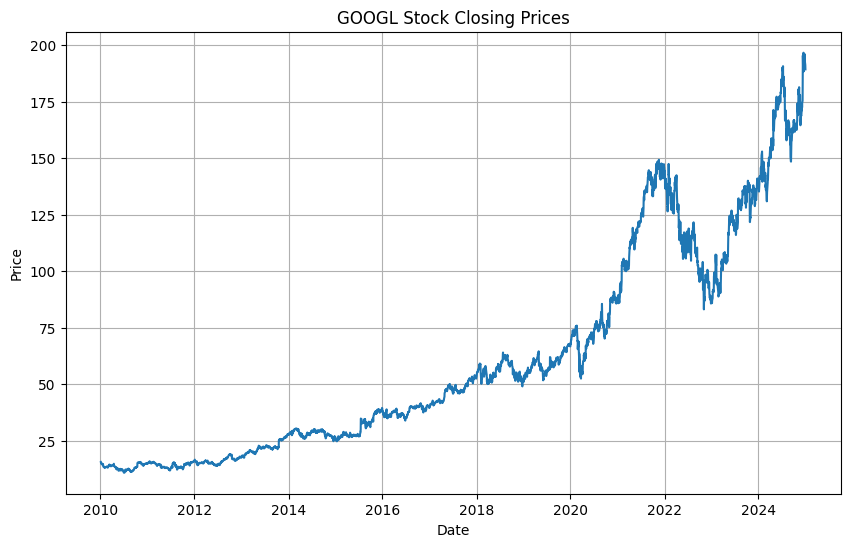

In [ ]:
# Step 4: Visualize stock data (Closing price)
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title("GOOGL Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [ ]:

# Step 5: Feature Engineering (Create a 'Target' column, the next day's close price)
data['Target'] = data['Close'].shift(-1)

# Step 6: Drop rows with missing values
data = data.dropna()

# Step 7: Prepare data for prediction
X = data[['Close']]  # Features (previous close prices)
y = data['Target']   # Target (next day's close price)

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 9: Create and train the Linear Regression model
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)

# Step 10: Make predictions
predictions = model.predict(X_test)

# Step 11: Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")



Mean Absolute Error: 1.932659197017995
Mean Squared Error: 6.996646411531999


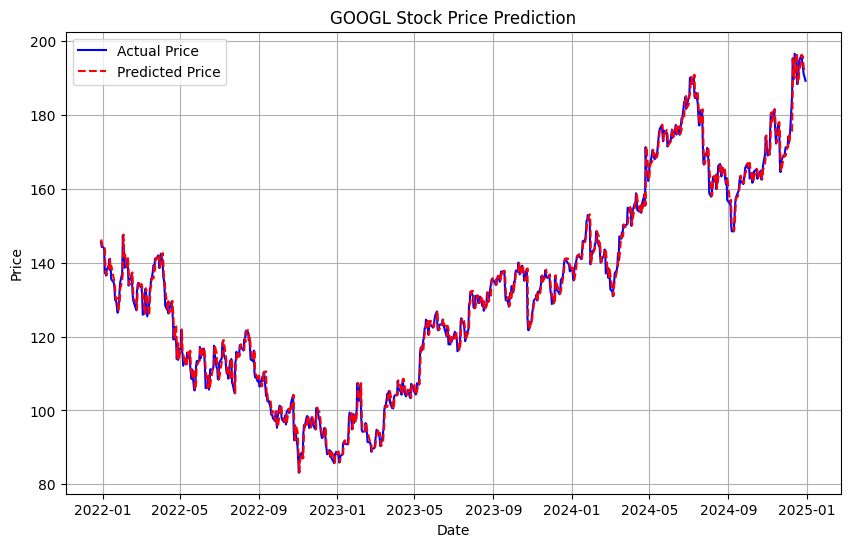

In [ ]:

# Step 12: Visualize the predictions vs. actual data
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, predictions, label="Predicted Price", color='red', linestyle='dashed')
plt.title("GOOGL Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
